In [1]:
import pathlib
import warnings
warnings.filterwarnings('ignore')
import os

# Third-party
import astropy.coordinates as coord
from astropy.io import fits
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import gala.coordinates as gc
from pyia import GaiaData

In [3]:
g_track = GaiaData('data/gd1_pass_cuts.fits')
g_track

<GaiaData: 1530 rows>

In [5]:
dist = g_track.get_distance(min_parallax=1e-3*u.mas)
c = g_track.get_skycoord(distance=dist)
stream_coord = c.transform_to(gc.GD1)
phi1 = stream_coord.phi1.degree
phi2 = stream_coord.phi2.degree

## Stream Track

In [78]:
phi1_min, phi1_max = -90, 10 #gd1
phi2_min, phi2_max = -10, 5

pixscale1=5
pixscale2=0.1

nphi1pix = int((phi1_max-phi1_min)/pixscale1)+1 # for a 0.2 x 0.05 pixel size
nphi2pix = int((phi2_max-phi2_min)/pixscale2)+1 # for a 0.2 x 0.05 pixel size

p1 = np.linspace(phi1_min,phi1_max,nphi1pix)
p2 = np.linspace(phi2_min,phi2_max,nphi2pix)
pp1,pp2 = np.meshgrid(p1,p2)

bins = [nphi1pix, nphi2pix]
bin_centers_phi1, bin_centers_phi2 = np.copy(p1[:-1]), np.copy(p2[:-1])
for i in range(len(p1)-1):
     bin_centers_phi1[i] = (p1[i]+p1[i+1])/2 
for i in range(len(p2)-1):
    bin_centers_phi2[i] = (p2[i]+p2[i+1])/2 

gd1_stream_catalog = np.histogram2d(phi1, phi2, bins)[0]

[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5] [-9.95 -9.85 -9.75 -9.65 -9.55 -9.45 -9.35 -9.25 -9.15 -9.05 -8.95 -8.85
 -8.75 -8.65 -8.55 -8.45 -8.35 -8.25 -8.15 -8.05 -7.95 -7.85 -7.75 -7.65
 -7.55 -7.45 -7.35 -7.25 -7.15 -7.05 -6.95 -6.85 -6.75 -6.65 -6.55 -6.45
 -6.35 -6.25 -6.15 -6.05 -5.95 -5.85 -5.75 -5.65 -5.55 -5.45 -5.35 -5.25
 -5.15 -5.05 -4.95 -4.85 -4.75 -4.65 -4.55 -4.45 -4.35 -4.25 -4.15 -4.05
 -3.95 -3.85 -3.75 -3.65 -3.55 -3.45 -3.35 -3.25 -3.15 -3.05 -2.95 -2.85
 -2.75 -2.65 -2.55 -2.45 -2.35 -2.25 -2.15 -2.05 -1.95 -1.85 -1.75 -1.65
 -1.55 -1.45 -1.35 -1.25 -1.15 -1.05 -0.95 -0.85 -0.75 -0.65 -0.55 -0.45
 -0.35 -0.25 -0.15 -0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75
  0.85  0.95  1.05  1.15  1.25  1.35  1.45  1.55  1.65  1.75  1.85  1.95
  2.05  2.15  2.25  2.35  2.45  2.55  2.65  2.75  2.85  2.95  3.05  3.15
  3.25  3.35  3.45  3.55  3.65  3.75  3.85  3.95  4.05  4.15  4.25  4.35
 

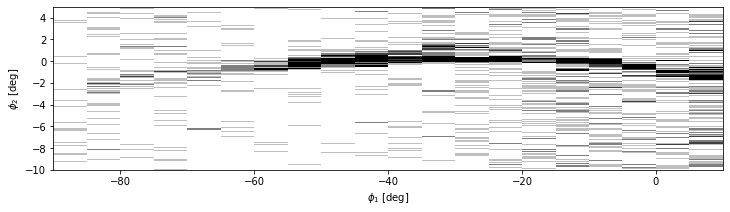

In [88]:
plt.figure(figsize=(12,3))
plt.pcolormesh(pp1, pp2,np.transpose(gd1_stream_catalog), cmap='gray_r',vmax=4, shading='flat')
plt.xlabel(r'$\phi_1$ [deg]'); plt.ylabel(r'$\phi_2$ [deg]')
plt.show()

In [103]:
aa = np.apply_along_axis(np.max, axis=1, arr=gd1_stream_catalog)
print(aa)

[ 1.  3.  3.  3.  2.  2.  5.  7. 10. 11.  6. 11. 11. 15.  5.  8. 15.  8.
 11.  7.  4.]


In [104]:
b = []
for i in range(len(gd1_stream_catalog)):
    bb = np.where(gd1_stream_catalog[i] == aa[i])[0]
    print(bb)
    b = np.append(b, np.median(bb))
b = np.around(b,0)
b = b.astype(int)
b

[  7  14  22  25  36  37  43  58  63  73  97 104 135 137]
[79]
[85]
[90]
[37 82 84 88 91]
[ 91  92  93  94  95 100]
[92]
[ 98 100]
[102]
[102]
[98]
[101]
[100]
[101]
[102]
[101]
[99]
[96]
[89]
[86]
[84]


Text(0, 0.5, '$\\phi_2$ [deg]')

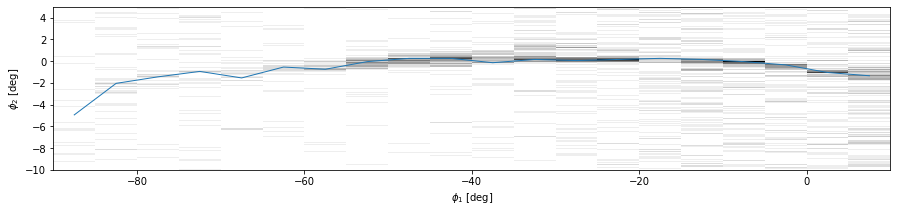

In [150]:
plt.figure(figsize = (15,3))
plt.plot(bin_centers_phi1, bin_centers_phi2[b][:-1], linewidth=1)
plt.pcolormesh(pp1, pp2,np.transpose(gd1_stream_catalog), cmap='gray_r')
plt.xlabel(r'$\phi_1$ [deg]'); plt.ylabel(r'$\phi_2$ [deg]')

In [151]:
stream_track = np.vstack([bin_centers_phi1, bin_centers_phi2[b][:-1]]).T
print(stream_track)

[[-8.75e+01 -4.95e+00]
 [-8.25e+01 -2.05e+00]
 [-7.75e+01 -1.45e+00]
 [-7.25e+01 -9.50e-01]
 [-6.75e+01 -1.55e+00]
 [-6.25e+01 -5.50e-01]
 [-5.75e+01 -7.50e-01]
 [-5.25e+01 -5.00e-02]
 [-4.75e+01  2.50e-01]
 [-4.25e+01  2.50e-01]
 [-3.75e+01 -1.50e-01]
 [-3.25e+01  1.50e-01]
 [-2.75e+01  5.00e-02]
 [-2.25e+01  1.50e-01]
 [-1.75e+01  2.50e-01]
 [-1.25e+01  1.50e-01]
 [-7.50e+00 -5.00e-02]
 [-2.50e+00 -3.50e-01]
 [ 2.50e+00 -1.05e+00]
 [ 7.50e+00 -1.35e+00]]


In [152]:
np.save('stream_track.npy', stream_track)

## Create the spur track

In [203]:
phi1_min_spur, phi1_max_spur = -45, -25 #gd1
phi2_min_spur, phi2_max_spur = 0.4, 2

pixscale1_spur=1
pixscale2_spur=0.1

nphi1pix_spur = int((phi1_max_spur-phi1_min_spur)/pixscale1_spur)+1 # for a 0.2 x 0.05 pixel size
nphi2pix_spur = int((phi2_max_spur-phi2_min_spur)/pixscale2_spur)+1 # for a 0.2 x 0.05 pixel size

p1_spur = np.linspace(phi1_min_spur,phi1_max_spur,nphi1pix_spur)
p2_spur = np.linspace(phi2_min_spur,phi2_max_spur,nphi2pix_spur)
pp1_spur,pp2_spur = np.meshgrid(p1_spur,p2_spur)

bins_spur = [nphi1pix_spur, nphi2pix_spur]
bin_centers_phi1_spur, bin_centers_phi2_spur = np.copy(p1_spur[:-1]), np.copy(p2_spur[:-1])
for i in range(len(p1_spur)-1):
     bin_centers_phi1_spur[i] = (p1_spur[i]+p1_spur[i+1])/2 
for i in range(len(p2_spur)-1):
    bin_centers_phi2_spur[i] = (p2_spur[i]+p2_spur[i+1])/2 

gd1_spur_catalog = np.histogram2d(phi1, phi2, bins_spur, range=[[-45,-25],[0.4,2]])[0]

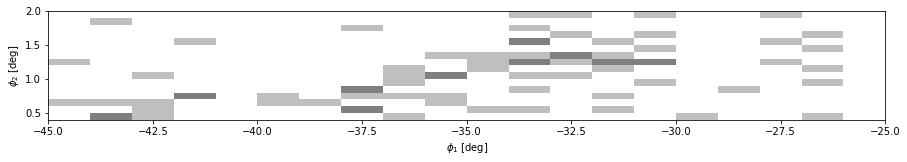

In [204]:
plt.figure(figsize=(15,2))
plt.pcolormesh(pp1_spur, pp2_spur,np.transpose(gd1_spur_catalog), cmap='gray_r',vmax=4, shading='flat')
plt.xlabel(r'$\phi_1$ [deg]'); plt.ylabel(r'$\phi_2$ [deg]')
plt.show()

In [205]:
aa_spur = np.apply_along_axis(np.max, axis=1, arr=gd1_spur_catalog)
print(aa_spur)

[1. 2. 1. 2. 0. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 0. 1.]


In [206]:
b_spur = []
for i in range(len(gd1_spur_catalog)):
    bb_spur = np.where(gd1_spur_catalog[i] == aa_spur[i])[0]
    print(bb_spur)
    b_spur = np.append(b_spur, np.median(bb_spur))
b_spur = np.around(b_spur,0)
b_spur = b_spur.astype(int)
b_spur

[2 8]
[0]
[0 1 2 6]
[3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[2 3]
[2]
[1 4]
[0 3 5 6 7]
[6]
[1 7 8 9]
[ 8 11]
[9]
[8]
[8]
[0]
[4]
[ 8 11 15]
[ 0  5  7 10 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 4  6 13]


Text(0, 0.5, '$\\phi_2$ [deg]')

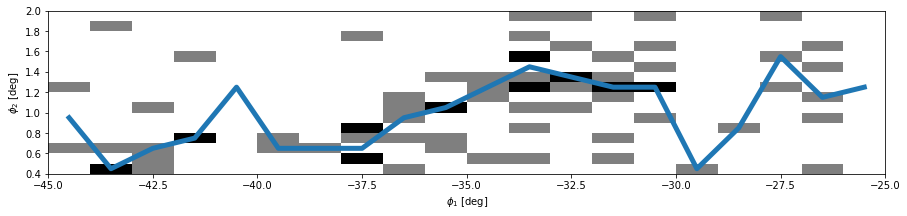

In [208]:
plt.figure(figsize = (15,3))
plt.plot(bin_centers_phi1_spur, bin_centers_phi2_spur[b_spur][:-1], linewidth=5)
plt.pcolormesh(pp1_spur, pp2_spur,np.transpose(gd1_spur_catalog), cmap='gray_r')
plt.xlabel(r'$\phi_1$ [deg]'); plt.ylabel(r'$\phi_2$ [deg]')

In [212]:
spur_track = np.vstack([bin_centers_phi1_spur, bin_centers_phi2_spur[b_spur][:-1]]).T
spur_track = spur_track[5:15]
spur_track[0][1] = 0.35
spur_track[6][1] = 1.35
spur_track[2][1] = 0.85
print(spur_track)

[[-39.5    0.35]
 [-38.5    0.65]
 [-37.5    0.85]
 [-36.5    0.95]
 [-35.5    1.05]
 [-34.5    1.25]
 [-33.5    1.35]
 [-32.5    1.35]
 [-31.5    1.25]
 [-30.5    1.25]]


Text(0, 0.5, '$\\phi_2$ [deg]')

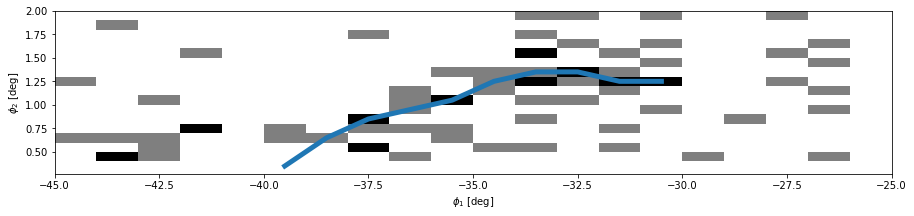

In [213]:
plt.figure(figsize = (15,3))
plt.plot(spur_track[:,0], spur_track[:,1], linewidth=5)
plt.pcolormesh(pp1_spur, pp2_spur,np.transpose(gd1_spur_catalog), cmap='gray_r')
plt.xlabel(r'$\phi_1$ [deg]'); plt.ylabel(r'$\phi_2$ [deg]')

In [214]:
np.save('spur_track.npy', spur_track)